# __Clustering Toronto Neighbourhoods__

>_Parikshit Verma (Ph:+91 9717522446)   
parikshit.iitvaranasi@gmail.com 
[Linkedin](https://www.linkedin.com/in/parikshit-verma-23a97699/ "Parikshit Verma") 
[GitHub](https://www.linkedin.com/in/parikshit-verma-23a97699/ "Parik309")_

_This project is to saggregate Toronto Neighbouhoods in various clusters depending on various categories of popular places._
* _Clustering various popular commercial places on the basis of geospatial locaton can reveal what categories of business are most likely to do well together._
* _This can also guide business owners to expand in new developing areas, assuming they are set to develope in line with Toronto (population composition, per capita income etc.)._
* _Additionally this analysis can also be used by people moving in new neighbourhoods to make an informaed decision based on their priorities_
* _Data used is sourced from public platforms like wikipedia, foursquare etc._


## 1. Importing all required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
import folium
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim

## 2. Data Collection, wrangling and EDA

### 2.1. Web Scraping

In [2]:
#Getting table from wikipedia using pandas
url="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
df1=pd.read_html(url,header=0)
#check length of data frame i.e. number of tables
len(df1)

3

In [3]:
# There are three tables in the dataframe but table of our interest is only first one that can be seen as below
df1[0].head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# store required table as new data frame for further processing
df1_mod=df1[0]
print(df1_mod.shape)
df1_mod.head()

(180, 3)


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
#Remove all "not assigned" boroughs
for ind,borough in enumerate(df1_mod['Borough']):
    if borough=='Not assigned':
        df1_mod.drop(ind,axis=0,inplace=True)
df1_mod.reset_index(drop=True, inplace=True)
#Dataframe after removing 'Not Assigned' boroughs
print(df1_mod.shape)
df1_mod.head()

(103, 3)


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
#If a neighbourhood is not assigned replacing the same with corresponding borough
for ind,neighb in enumerate(df1_mod['Neighbourhood']):
    if neighb=='Not assigned':
        df1_mod.loc[ind,'Neighbourhood']=df1.loc[ind,'Borough']
#Dataframe after removing 'Not Assigned' boroughs
print(df1_mod.shape)
df1_mod.head()

(103, 3)


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### 2.2 Importing geospatial location of canada postal codes

In [8]:
df2=pd.read_csv('Toronto_Geospatial_Coordinates.csv')
#Geospatial Dataframe
print(df2.shape)
df2.head()

(103, 3)


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [9]:
#Combining postal code data with corresponding geospatial co-ordinate to form one table
df3_comb=df1_mod.join(df2.set_index('Postal Code'),on='Postal Code')
#Dataframe after combining scraped data with geospatial data
print(df3_comb.shape)
df3_comb.head()

(103, 5)


,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


### 2.3 Plotting all postal codes on map

In [10]:
# getting geospatial co-ordinates of Toronto to be used as reference point
location=None
while location is None:
    geolocator=Nominatim(user_agent="toronto_exp")
    location=geolocator.geocode('Toronto, Canada')
map_toronto = folium.Map([location.latitude,location.longitude], zoom_start = 11, tiles='CartoDB Positron')
# Plotting all postal codes
for i,po in enumerate(df3_comb['Postal Code']):
    pc=df3_comb.iloc[i][0]
    br=df3_comb.iloc[i][1]
    nh=df3_comb.iloc[i][2]
    lt=df3_comb.iloc[i][3]
    ln=df3_comb.iloc[i][4]
    label="{}\n{}\n{}".format(pc, br, nh)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lt,ln],
        radius=5,
        popup=label,
        color='green',
        weight=2,
        fill=True,
        fill_color='#6FF81C',
        fill_opacity=0.5,
        parse_html=False
        ).add_to(map_toronto)
map_toronto

In [11]:
# Since name of borough and neighbourhood is not required in our analysis hence same may be dropped
df4_minimised=df3_comb[['Postal Code','Latitude','Longitude']]
df4_minimised.head()

,Postal Code,Latitude,Longitude
0,M3A,43.753259,-79.329656
1,M4A,43.725882,-79.315572
2,M5A,43.654260,-79.360636
3,M6A,43.718518,-79.464763
4,M7A,43.662301,-79.389494


### 2.5 Using four square API and finding popular places in 500m of all postal codes
Foursquare API provides various ways to query data based on location.  
In particular we are going to use explore feature of the API that returns details of most popular places within defined radius of any defined location.

<!--# API credintials
CLIENT_ID = 'FQB4JTYADD4RQHXQKFSGZS4MJKAYKPZE2KNZJ1MREAU00C1V'
CLIENT_SECRET = 'KFDZPRFZQDFYJRGHQ3KPBUAPVMENUCX4ZJM2V421POEC0FW3'
-->

In [15]:
VERSION = '20201025'
LIMIT = 100
radius = 500

In [16]:
#function to get and clean json file
def clean(pc,lt,lng):
    venue=[]
    for postal,lat,lon in zip(pc,lt,lng):
        url='https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, radius, LIMIT)
        result=requests.get(url).json()['response']['groups'][0]['items']
        for ind,v in enumerate(result):
            name=v['venue']['name']
            lat3=v['venue']['location']['lat']
            lon3=v['venue']['location']['lng']
            cat=v['venue']['categories'][0]['name']
            venue.append([postal,lat,lon,name,lat3,lon3,cat])
    return venue

In [17]:
Venue_cleaned=clean(df4_minimised['Postal Code'], df4_minimised['Latitude'], df4_minimised['Longitude'])

In [18]:
df6_venue=pd.DataFrame(Venue_cleaned,columns=["Postal Code","Latitude","Longitude","Name","Venue_Latitude","Venue_Longitude","Category"])
#Dataframe of data through API query
print(df6_venue.shape)
df6_venue.head()

(2141, 7)


,Postal Code,Latitude,Longitude,Name,Venue_Latitude,Venue_Longitude,Category
0,M3A,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,M4A,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,M4A,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,M4A,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [19]:
#lets have a look at how many categories we have in our data frame
print("No. of unique categories of places of interest = ",len(df6_venue['Category'].value_counts()))

No. of unique categories of places of interest =  273


### 2.6 Visualizing data

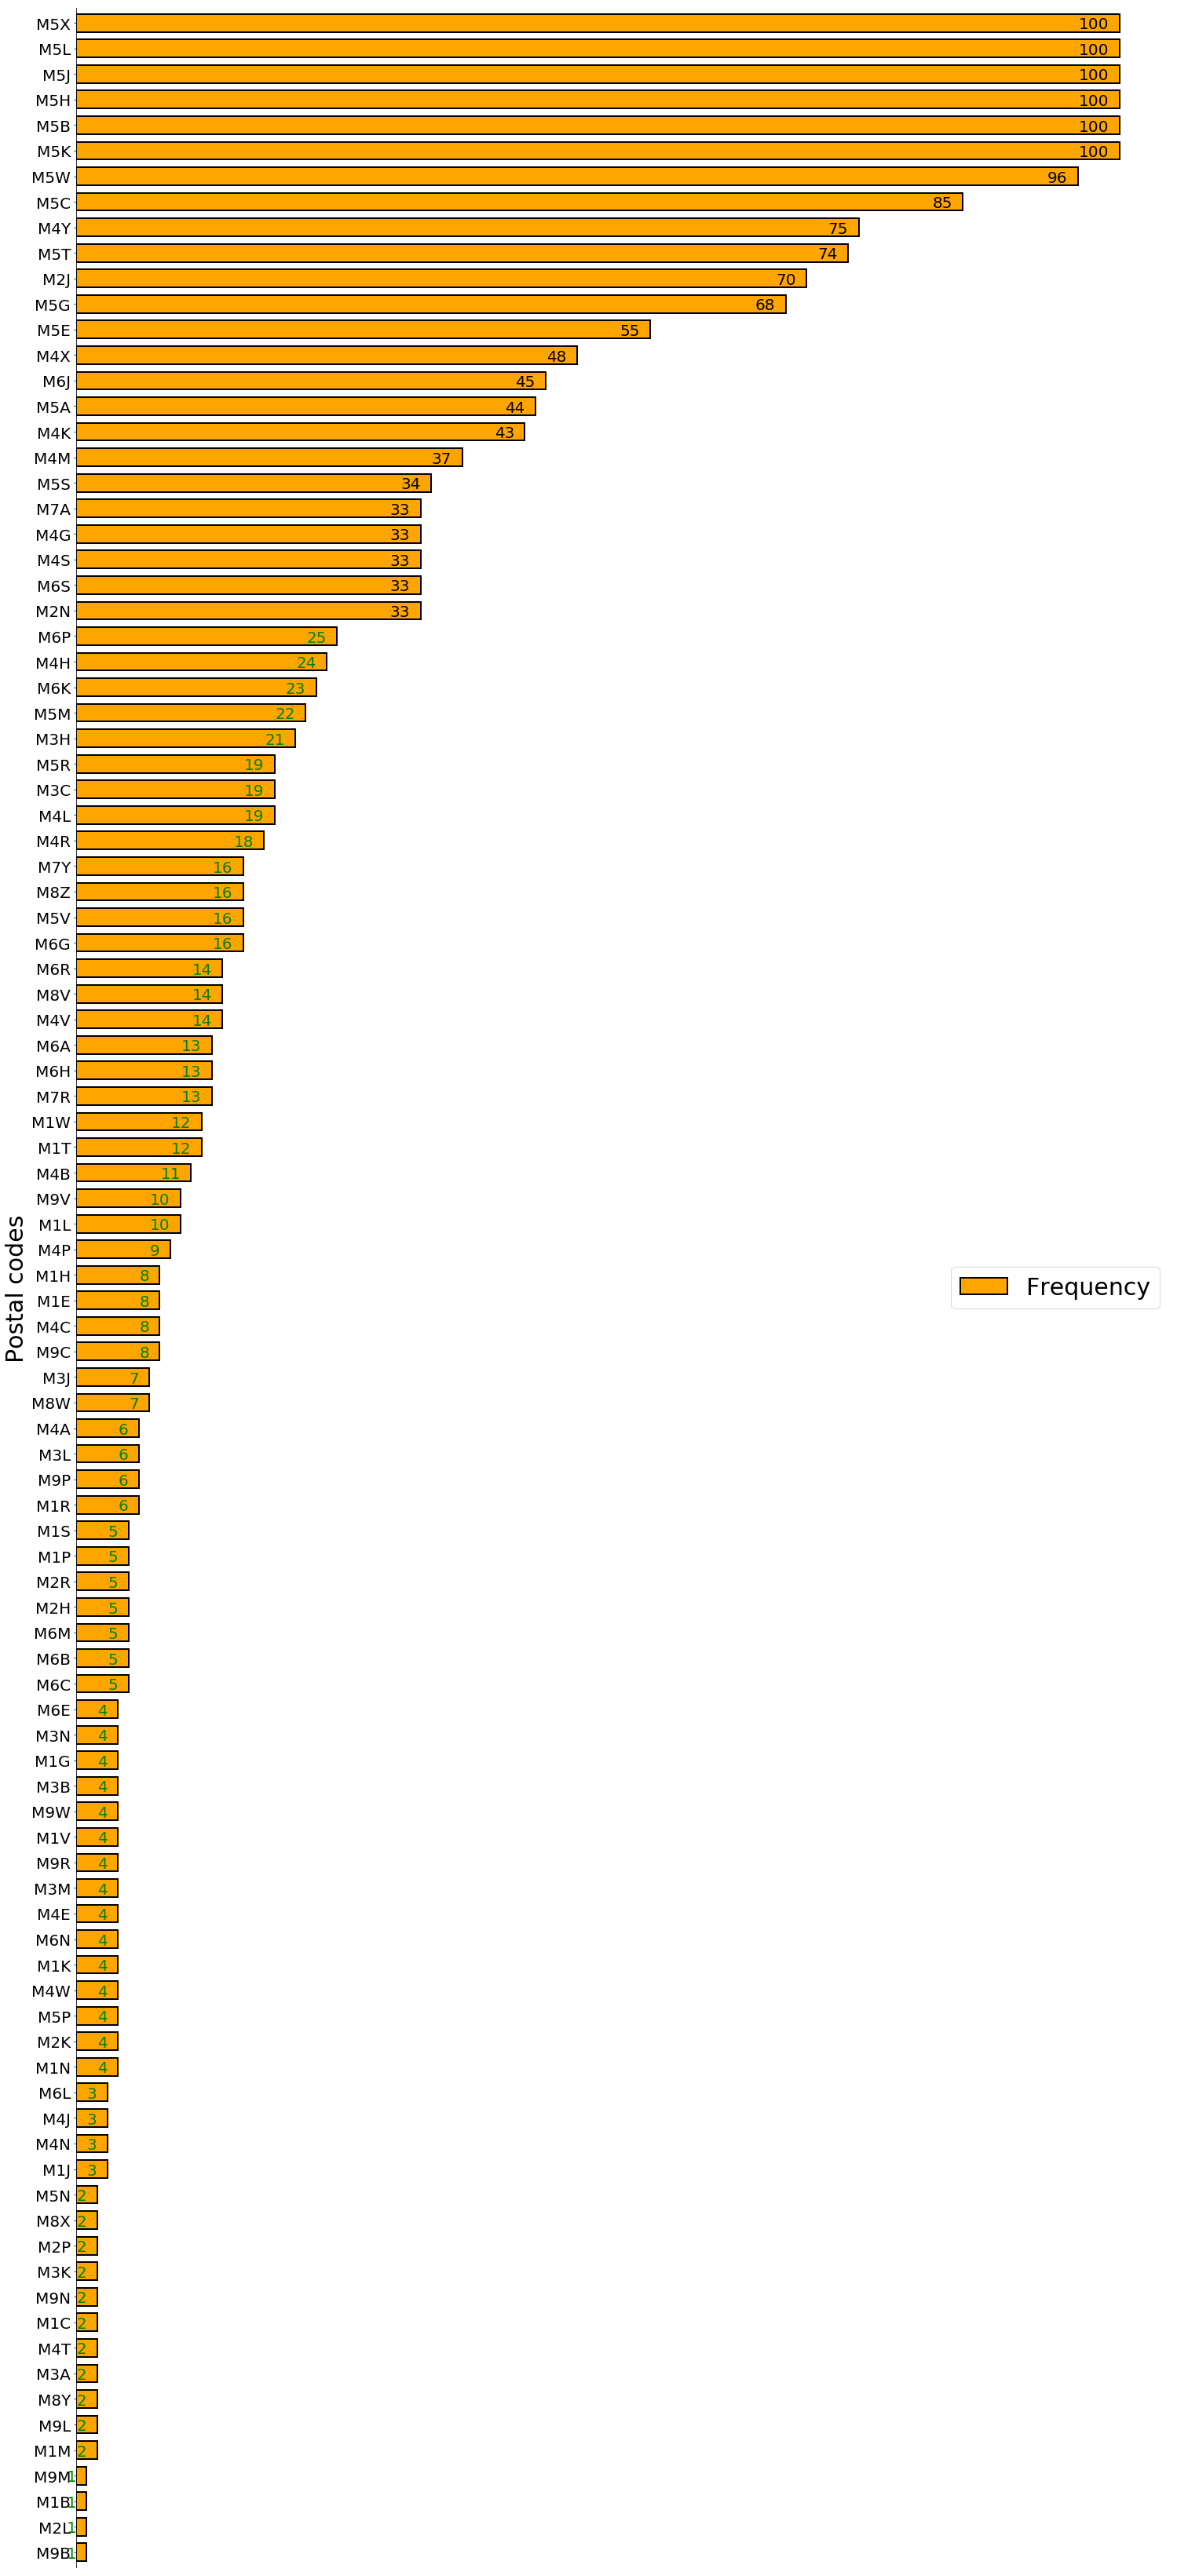

In [20]:
#plot horizontal bar chart to get frequency visulaisation of places of interest area wise
pc_count=df6_venue['Postal Code'].value_counts()
df_barh_vis1=pd.DataFrame(pc_count)
df_barh_vis1.columns=['Count']
df_barh_vis1.sort_values('Count',ascending=True, inplace = True)
ax=df_barh_vis1.plot(kind='barh',figsize=(25,60),align='center', color='orange',edgecolor='black',linewidth=2,fontsize=20,width=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel("Postal codes", fontsize=30)
ax.legend(["Frequency"],loc='center right',fontsize=30)
for val in ax.patches:
        y=val.get_y()
        x=val.get_width()
        if x>30:
            color='black'
        else:
            color='green'
        plt.text(x-1,y+0.3,int(x),fontsize=20,ha='right',va='center',color=color)

As clear from above chart, that places with frequency less than 10 are not of much importance and hence can interfere with final clustering hence removing the same from our data frame

In [21]:
# making a new data frame for further processing
df6_venue_pc10=df6_venue
pc_count= df6_venue['Postal Code'].value_counts()>10
pc1=[pc_count.index[i] for i in range(pc_count.sum())]
for i,postal in enumerate(df6_venue_pc10['Postal Code']):
    flag=0
    for j in pc1:
        if(j==postal):
            flag=1
    if flag==0:
        df6_venue_pc10.drop(i,axis=0,inplace=True)
df6_venue_pc10.reset_index(drop=True, inplace=True)
# Data frame details
print(df6_venue_pc10.shape)
df6_venue_pc10.head()

(1909, 7)


,Postal Code,Latitude,Longitude,Name,Venue_Latitude,Venue_Longitude,Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,M5A,43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,M5A,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant


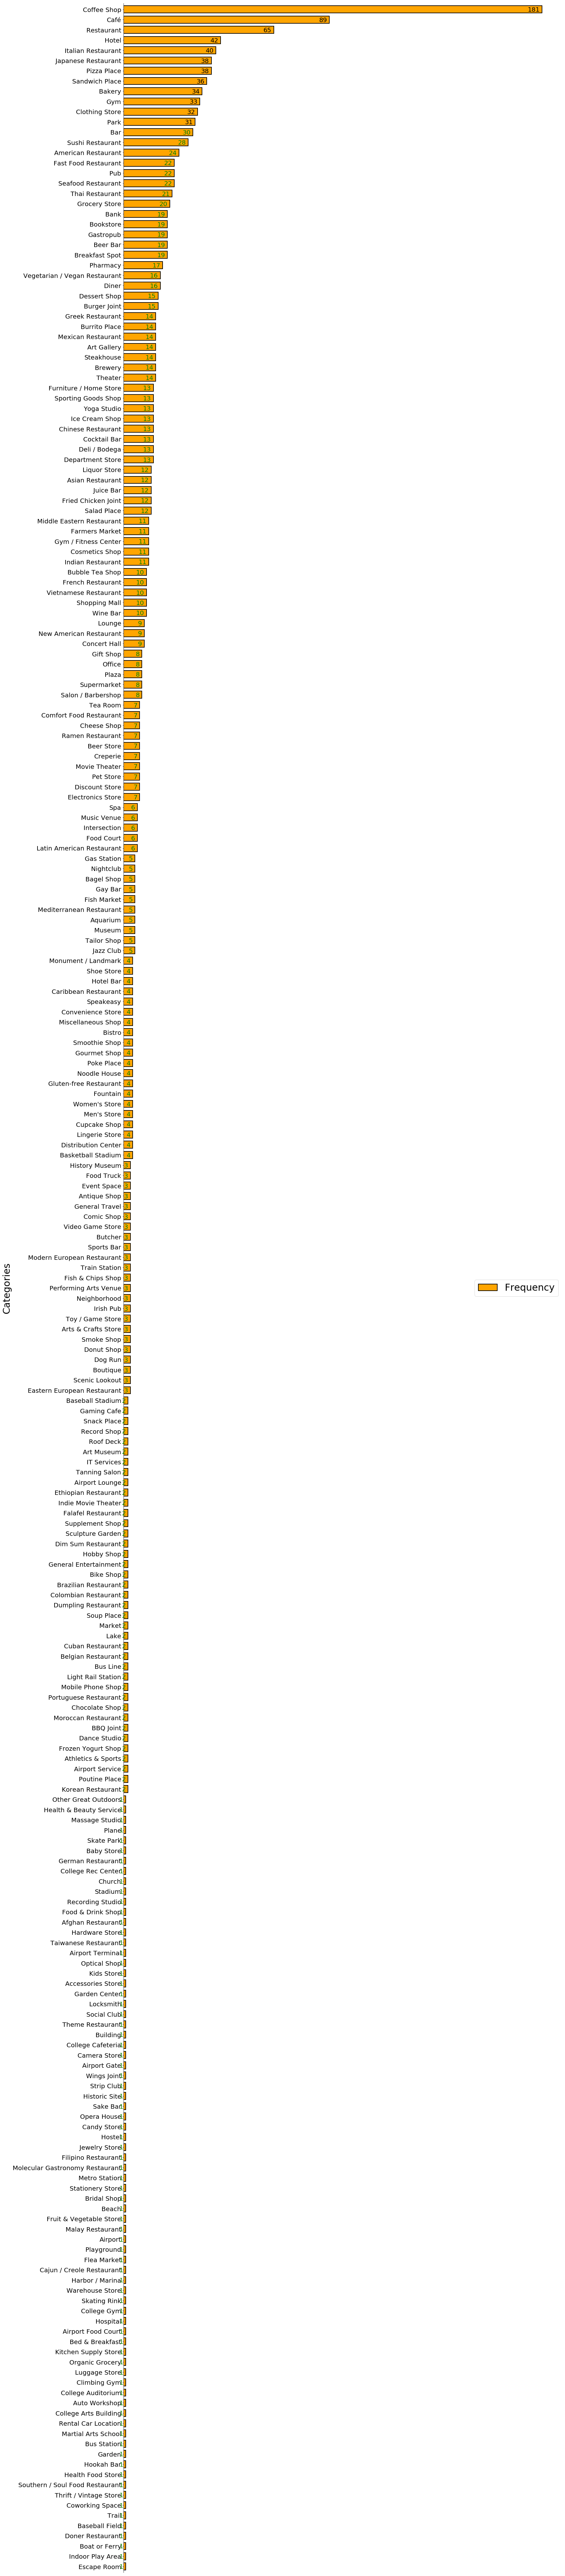

In [22]:
#plot horizontal bar chart to get frequency visulaisation of places of interest category wise
cat_count=df6_venue_pc10['Category'].value_counts()
df_barh_vis1=pd.DataFrame(cat_count)
df_barh_vis1.columns=['Count']
df_barh_vis1.sort_values('Count',ascending=True, inplace = True)
ax=df_barh_vis1.plot(kind='barh',figsize=(25,150),align='center', color='orange',edgecolor='black',linewidth=2,fontsize=20,width=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel("Categories", fontsize=30)
ax.legend(["Frequency"],loc='center right',fontsize=30)
for val in ax.patches:
        y=val.get_y()
        x=val.get_width()
        if x>30:
            color='black'
        else:
            color='green'
        plt.text(x-1,y+0.3,int(x),fontsize=20,ha='right',va='center',color=color)

As clear from above chart, that categories with frequency less than 20 are not of much importance and hence can interfere with final clustering hence removing the same from our data frame

In [23]:
# making a new data frame for further processing
df6_venue_pc10_cat10=df6_venue_pc10
cat_count= df6_venue_pc10['Category'].value_counts()>10
cat1=[cat_count.index[i] for i in range(cat_count.sum())]
for i,category in enumerate(df6_venue_pc10_cat10['Category']):
    flag=0
    for j in cat1:
        if(j==category):
            flag=1
    if flag==0:
        df6_venue_pc10_cat10.drop(i,axis=0,inplace=True)
df6_venue_pc10_cat10.reset_index(drop=True, inplace=True)
# Data frame details
print(df6_venue_pc10_cat10.shape)
df6_venue_pc10_cat10.head()

(1339, 7)


,Postal Code,Latitude,Longitude,Name,Venue_Latitude,Venue_Longitude,Category
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
3,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
4,M5A,43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center


## 3 Feature engineering

### 3.1 One hot encoding

In [24]:
df7_ohe=pd.get_dummies(df6_venue_pc10_cat10[['Postal Code']],prefix="",prefix_sep="")
#Adding postal code column to the data frame
df7_ohe['Category']=df6_venue_pc10_cat10['Category']
#Making Postal code column as first column
seq_col=[df7_ohe.columns[-1]]+list(df7_ohe.columns[:-1])
df7_ohe=df7_ohe[seq_col]
# Data frame details
print(df7_ohe.shape)
df7_ohe.head()

(1339, 47)


,Category,M1T,M1W,M2J,M2N,M3C,M3H,M4B,M4G,M4H,...,M6J,M6K,M6P,M6R,M6S,M7A,M7R,M7Y,M8V,M8Z
0,Bakery,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Coffee Shop,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Breakfast Spot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gym / Fitness Center,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#data frame of mean frequecy of each category for all postal codes
df7_ohe_mean=df7_ohe.groupby('Category').mean().reset_index()
# Data frame details
print(df7_ohe_mean.shape)
df7_ohe_mean.head()

(55, 47)


,Category,M1T,M1W,M2J,M2N,M3C,M3H,M4B,M4G,M4H,...,M6J,M6K,M6P,M6R,M6S,M7A,M7R,M7Y,M8V,M8Z
0,American Restaurant,0.000000,0.000000,0.041667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.041667,0.0,0.041667,0.000000
1,Art Gallery,0.000000,0.000000,0.000000,0.0,0.071429,0.000000,0.000000,0.000000,0.000000,...,0.071429,0.000000,0.000000,0.0,0.000000,0.071429,0.000000,0.0,0.000000,0.000000
2,Asian Restaurant,0.000000,0.000000,0.083333,0.0,0.083333,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,Bakery,0.000000,0.000000,0.058824,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.029412,0.029412,0.029412,0.0,0.000000,0.000000,0.000000,0.0,0.029412,0.029412
4,Bank,0.052632,0.052632,0.105263,0.0,0.000000,0.105263,0.052632,0.105263,0.052632,...,0.000000,0.000000,0.000000,0.0,0.052632,0.052632,0.000000,0.0,0.000000,0.000000


## 4. Clustering using K-Means

Lets segment the categories in 5 parts based on their location wise occurance freuency. Hence deriving insight as to what businesses are thriving togather based on different neighbourhoods of Toronto.

In [26]:
df8_cluster=df7_ohe_mean.copy(deep=True)
groups=5
df8_cluster.drop('Category',axis=1,inplace=True)
kmeans=KMeans(init = 'k-means++', n_clusters = groups, n_init = 12)
kmeans.fit(df8_cluster)
print(kmeans.labels_)

[1 1 4 0 0 1 1 1 1 0 0 1 1 0 3 1 1 3 4 1 0 0 1 0 0 0 1 2 0 1 1 4 0 0 0 1 0
 0 0 0 0 0 0 0 1 4 0 1 0 4 0 1 1 1 0]


In [27]:
df_label=df7_ohe_mean[['Category']]
df_label['Labels']=kmeans.labels_
df_label.set_index('Category', inplace=True)
#Data frame details
print(df_label.shape)
df_label.head()

(55, 1)


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Labels
Category,
American Restaurant,1
Art Gallery,1
Asian Restaurant,4
Bakery,0
Bank,0


## 5. Cluster Visualization

In [28]:
# Adding labels back to data frame df6_venue_pc20_cat20
df9_labeled=df6_venue_pc10_cat10
label=[]
for cat in df9_labeled['Category']:
    for cat_label in df_label.index:
        if cat==cat_label:
            label.append(df_label.loc[cat_label,'Labels'])
df9_labeled['Cluster']=label
# Data frame details
print(df9_labeled.shape)
df9_labeled.head()

(1339, 8)


,Postal Code,Latitude,Longitude,Name,Venue_Latitude,Venue_Longitude,Category,Cluster
0,M5A,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0
1,M5A,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,1
2,M5A,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant,1
3,M5A,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,1
4,M5A,43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center,1


In [29]:
# Adding boroughs back to data frame
df_final=df9_labeled
bor=[]
for pc in df_final['Postal Code']:
    for pc1,b in zip(df3_comb['Postal Code'],df3_comb['Borough']):
        if pc==pc1:
           bor.append(b)
df_final.insert(1, 'Borough', borough)
# Data frame details
print(df_final.shape)
df_final.head()

(1339, 9)


,Postal Code,Borough,Latitude,Longitude,Name,Venue_Latitude,Venue_Longitude,Category,Cluster
0,M5A,Not assigned,43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery,0
1,M5A,Not assigned,43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop,1
2,M5A,Not assigned,43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant,1
3,M5A,Not assigned,43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot,1
4,M5A,Not assigned,43.65426,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center,1


In [30]:
while location is None:
    geolocator=Nominatim(user_agent="toronto_exp")
    location=geolocator.geocode('Toronto, Canada')

In [31]:
map_toronto = folium.Map([location.latitude,location.longitude], zoom_start = 12, tiles='CartoDB Positron')
#Borough = 'Downtown Toronto' <<this line to be used for visualising one borough>>
color=['red','blue','yellow','green','cyan']
fill_color=['#F90707','#0E6FF4','#F8F806','#06F815','#06F8F8']
for i,cl in enumerate(df_final['Cluster']):
    name=df_final.iloc[i,4]
    cat=df_final.iloc[i,7]
    v_lat=df_final.iloc[i,5]
    v_lng=df_final.iloc[i,6]
    label="{}-{}({})".format(cl,name,cat)
    label=folium.Popup(label,parse_html=True)
    #if df_final.iloc[i][1] == Borough: <<this line to be used for visualising one borough>>
    folium.CircleMarker(
        [v_lat,v_lng],
        radius=5,
        popup=label,
        color=color[cl],
        weight=3,
        fill=True,
        fill_color=fill_color[cl],
        fill_opacity=0.5,
        parse_html=False
        ).add_to(map_toronto)
map_toronto

## 6. Conclusion

Lets see the clusters along with borough name for better understanding

In [32]:
#converting column name from postal code to borough name

df_top10pc=df7_ohe_mean.copy(deep=True)
col=['Category']
for i,pc in enumerate(df_top10pc.columns):
    for pc1,b in zip(df3_comb['Postal Code'],df3_comb['Borough']):
        if pc==pc1:
            col.append(b)
df_top10pc.columns=col
# finding 10 most popular boroughs for each category of places of interest
top10pc=[]
for i in range(df_top10pc.shape[0]):
    temp=df_top10pc.iloc[i,1:].sort_values(axis=0, ascending=False).head(10)
    top10pc.append(temp.index)
df_top10pc=pd.DataFrame(top10pc)
df_top10pc['Category']=df7_ohe_mean['Category']
df_top10pc.columns=list(range(1,11))+['Category']
df_top10pc.set_index('Category', inplace=True)
df_top10pc.reset_index(inplace=True)
#add cluster label to the data frame
df_top10pc['Cluster']=kmeans.labels_
# Data frame details
print(df_top10pc.shape)
df_top10pc.head()


(55, 12)


,Category,1,2,3,4,5,6,7,8,9,10,Cluster
0,American Restaurant,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,East Toronto,Downtown Toronto,North York,Central Toronto,Downtown Toronto,Etobicoke,1
1,Art Gallery,Downtown Toronto,West Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,1
2,Asian Restaurant,Downtown Toronto,West Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,North York,North York,Central Toronto,4
3,Bakery,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,East Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,West Toronto,0
4,Bank,East York,North York,North York,Scarborough,Downtown Toronto,Downtown Toronto,Downtown Toronto,Central Toronto,Downtown Toronto,East Toronto,0


#### Cluster 1

In [33]:
import itertools
cluster1=df_top10pc[df_top10pc['Cluster']==0].reset_index(drop=True)
cluster1

,Category,1,2,3,4,5,6,7,8,9,10,Cluster
0,Bakery,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,East Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,West Toronto,0
1,Bank,East York,North York,North York,Scarborough,Downtown Toronto,Downtown Toronto,Downtown Toronto,Central Toronto,Downtown Toronto,East Toronto,0
2,Brewery,Downtown Toronto,East Toronto,Downtown Toronto,East Toronto,Downtown Toronto,Central Toronto,West Toronto,West Toronto,East York,East Toronto,0
3,Burger Joint,East York,Downtown Toronto,Downtown Toronto,Etobicoke,Downtown Toronto,North York,East York,Downtown Toronto,Downtown Toronto,Downtown Toronto,0
4,Chinese Restaurant,Downtown Toronto,Scarborough,Scarborough,North York,Downtown Toronto,Downtown Toronto,North York,North York,Downtown Toronto,Downtown Toronto,0
5,Dessert Shop,Central Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,Downtown Toronto,West Toronto,West Toronto,Downtown Toronto,East York,0
6,Diner,Downtown Toronto,Downtown Toronto,East Toronto,Central Toronto,Downtown Toronto,Downtown Toronto,North York,West Toronto,Downtown Toronto,West Toronto,0
7,Fast Food Restaurant,North York,Scarborough,Downtown Toronto,Etobicoke,Downtown Toronto,North York,East York,East Toronto,Central Toronto,Downtown Toronto,0
8,Fried Chicken Joint,Downtown Toronto,Scarborough,West Toronto,Etobicoke,Downtown Toronto,Central Toronto,North York,Downtown Toronto,Mississauga,Downtown Toronto,0
9,Furniture / Home Store,East Toronto,East York,Downtown Toronto,West Toronto,Downtown Toronto,Central Toronto,Downtown Toronto,Downtown Toronto,North York,West Toronto,0


In [34]:
print("For following categories---- \n ",cluster1['Category'].unique())
print("\n\nMost popular boroughs are---- \n",list(set(cluster1.drop('Category',axis=1).values.flatten()))[1:])

For following categories---- 
  ['Bakery' 'Bank' 'Brewery' 'Burger Joint' 'Chinese Restaurant'
 'Dessert Shop' 'Diner' 'Fast Food Restaurant' 'Fried Chicken Joint'
 'Furniture / Home Store' 'Grocery Store' 'Ice Cream Shop'
 'Indian Restaurant' 'Italian Restaurant' 'Juice Bar' 'Liquor Store'
 'Mexican Restaurant' 'Middle Eastern Restaurant' 'Park' 'Pharmacy'
 'Pizza Place' 'Pub' 'Sandwich Place' 'Sporting Goods Shop'
 'Sushi Restaurant' 'Yoga Studio']


Most popular boroughs are---- 
 ['North York', 'Mississauga', 'Central Toronto', 'Etobicoke', 'West Toronto', 'East York', 'East Toronto', 'Downtown Toronto', 'Scarborough']


#### Cluster 2

In [35]:
cluster2=df_top10pc[df_top10pc['Cluster']==1].reset_index(drop=True)
cluster2

,Category,1,2,3,4,5,6,7,8,9,10,Cluster
0,American Restaurant,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,East Toronto,Downtown Toronto,North York,Central Toronto,Downtown Toronto,Etobicoke,1
1,Art Gallery,Downtown Toronto,West Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,1
2,Bar,Downtown Toronto,West Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,West Toronto,East Toronto,Downtown Toronto,1
3,Beer Bar,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,1
4,Bookstore,Downtown Toronto,Downtown Toronto,East Toronto,Downtown Toronto,Downtown Toronto,East Toronto,West Toronto,West Toronto,Downtown Toronto,Downtown Toronto,1
5,Breakfast Spot,Downtown Toronto,Downtown Toronto,Downtown Toronto,West Toronto,West Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,1
6,Burrito Place,Downtown Toronto,Downtown Toronto,North York,East Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Etobicoke,West Toronto,1
7,Café,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,1
8,Cocktail Bar,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,West Toronto,Downtown Toronto,Downtown Toronto,East York,Central Toronto,Downtown Toronto,1
9,Coffee Shop,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,1


In [36]:
print("For following categories---- \n ",cluster2['Category'].unique())
print("\n\nMost popular boroughs are---- \n",list(set(cluster2.drop('Category',axis=1).values.flatten()))[1:])

For following categories---- 
  ['American Restaurant' 'Art Gallery' 'Bar' 'Beer Bar' 'Bookstore'
 'Breakfast Spot' 'Burrito Place' 'Café' 'Cocktail Bar' 'Coffee Shop'
 'Department Store' 'Farmers Market' 'Gastropub' 'Gym'
 'Gym / Fitness Center' 'Japanese Restaurant' 'Restaurant'
 'Seafood Restaurant' 'Thai Restaurant' 'Theater'
 'Vegetarian / Vegan Restaurant']


Most popular boroughs are---- 
 ['North York', 'Central Toronto', 'Etobicoke', 'West Toronto', 'East York', 'East Toronto', 'Downtown Toronto', 'Scarborough']


#### Cluster 3

In [37]:
cluster3=df_top10pc[df_top10pc['Cluster']==2].reset_index(drop=True)
cluster3

,Category,1,2,3,4,5,6,7,8,9,10,Cluster
0,Greek Restaurant,East Toronto,North York,Downtown Toronto,North York,West Toronto,Downtown Toronto,Downtown Toronto,Central Toronto,Etobicoke,Central Toronto,2


In [38]:
print("For following categories---- \n ",cluster3['Category'].unique())
print("\n\nMost popular boroughs are---- \n",list(set(cluster3.drop('Category',axis=1).values.flatten()))[1:])

For following categories---- 
  ['Greek Restaurant']


Most popular boroughs are---- 
 ['North York', 'Central Toronto', 'Etobicoke', 'West Toronto', 'East Toronto', 'Downtown Toronto']


#### Cluster 4

In [40]:
cluster4=df_top10pc[df_top10pc['Cluster']==3].reset_index(drop=True)
cluster4

,Category,1,2,3,4,5,6,7,8,9,10,Cluster
0,Clothing Store,Downtown Toronto,North York,North York,Downtown Toronto,Central Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,East Toronto,North York,3
1,Cosmetics Shop,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,East Toronto,Downtown Toronto,Central Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,3


In [41]:
print("For following categories---- \n ",cluster4['Category'].unique())
print("\n\nMost popular boroughs are---- \n",list(set(cluster4.drop('Category',axis=1).values.flatten()))[1:])

For following categories---- 
  ['Clothing Store' 'Cosmetics Shop']


Most popular boroughs are---- 
 ['North York', 'Central Toronto', 'East Toronto', 'Downtown Toronto']


#### Cluster 5

In [42]:
cluster5=df_top10pc[df_top10pc['Cluster']==4].reset_index(drop=True)
cluster5

,Category,1,2,3,4,5,6,7,8,9,10,Cluster
0,Asian Restaurant,Downtown Toronto,West Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,North York,North York,Central Toronto,4
1,Deli / Bodega,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,4
2,Hotel,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Mississauga,4
3,Salad Place,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,Central Toronto,Downtown Toronto,Scarborough,4
4,Steakhouse,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,Downtown Toronto,North York,Downtown Toronto,Downtown Toronto,East Toronto,Downtown Toronto,4


In [44]:
print("For following categories---- \n ",cluster5['Category'].unique())
print("\n\nMost popular boroughs are---- \n",list(set(cluster5.drop('Category',axis=1).values.flatten()))[1:])

For following categories---- 
  ['Asian Restaurant' 'Deli / Bodega' 'Hotel' 'Salad Place' 'Steakhouse']


Most popular boroughs are---- 
 ['North York', 'Mississauga', 'Central Toronto', 'West Toronto', 'East Toronto', 'Downtown Toronto', 'Scarborough']
